## Imports

In [111]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

## Load .csv into df


In [112]:
df = pd.read_csv("phishing_email_projectthesis.csv") # load data into dataframe

## View and Prepare Data

In [113]:
df = df.rename(columns={'text_combined': 'content'}).rename(columns={'label': 'target'}) # rename columns

In [114]:
df.shape 

(82486, 2)

In [115]:
print(df[df.duplicated(keep=False)]) # show all duplicated rows

                                                 content  target
17     noms actual vols 3 26 01 eileen gas control re...       0
18     noms actual vols 3 26 01 eileen gas control re...       0
22     enron hpl actuals march 28 2001 estimated actu...       0
23     enron hpl actuals march 28 2001 estimated actu...       0
27     nom vols 3 24 thru 3 26 01 agree eileen ponton...       0
...                                                  ...     ...
80219  nan attn may conceren dear one christ good day...       1
80230  mrwilson ogodi wilson_ogodi0232000yahoocojp 新し...       1
80231  mrwilson ogodi wilson_ogodi0232000yahoocojp 新し...       1
80808  dr ahmed hassan ahassan1696gmailcom kind atten...       1
80809  dr ahmed hassan ahassan1696gmailcom kind atten...       1

[815 rows x 2 columns]


In [116]:
df = df.drop_duplicates(keep='first') # drop duplicates but keep the first

In [117]:
df.shape

(82078, 2)

In [118]:
df.info() # show data types and number of rows

<class 'pandas.core.frame.DataFrame'>
Index: 82078 entries, 0 to 82485
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  82078 non-null  object
 1   target   82078 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.9+ MB


In [119]:
df.head(20) # show the first 20 rows

,content,target
0,hpl nom may 25 2001 see attached file hplno 52...,0
1,nom actual vols 24 th forwarded sabrae zajac h...,0
2,enron actuals march 30 april 1 201 estimated a...,0
3,hpl nom may 30 2001 see attached file hplno 53...,0
4,hpl nom june 1 2001 see attached file hplno 60...,0
5,hpl nom may 31 2001 see attached file hplno 53...,0
6,9760 tried get fancy address came back forward...,0
7,hpl noms february 15 2000 see attached file hp...,0
8,fw pooling contract template original message ...,0
9,hpl nom march 28 2000 see attached file hplo 3...,0


In [122]:
df.isnull().sum() # check for missing values

content    0
target     0
dtype: int64

In [123]:
df.describe() 

,target
count,82078.000000
mean,0.522003
std,0.499519
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [124]:
df['content'].apply(len).mean() # average number of numbers and letters in one mail

np.float64(1290.495869782402)

In [125]:
df['content'].apply(lambda x: len(x.split())).mean() # average number of words in one mail

np.float64(160.71500280221252)

Text(0.5, 1.0, 'Balance')

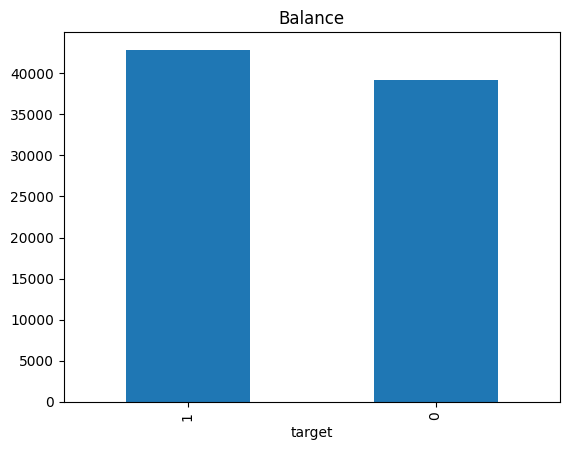

In [120]:
df['target'].value_counts().plot(kind='bar') # bar chart showing the balance between 1 and 0
plt.title('Balance')